# Материалы

[Дашборд](https://public.tableau.com/views/_17007427607740/sheet1?:language=ko-KR&publish=yes&:display_count=n&:origin=viz_share_link)

[Презентация](https://drive.google.com/file/d/153_sE_QaBgLckDovPekWCtKvi58CubEl/view?usp=sharing)

# Анализ оттока клиентов

**Цель:** провести анализ оттока клиентов
    
**Задачи:**

    1. Определить все значимые признаки отточности
    2. Сформулировать и проверить сатистические гипотезы
    3. Сформировать сегменты
    4. Сделать выводы и дать рекомендации
    
**Ход работы**
1. Загрузить данные и изучить общую информацию
2. Выполнить предобработку данных
- проверить на наличие пропусков, дубликатов, выбросов
- преобразовать категориальные переменные, создать новые столбцы
3. Анализ данных
* построение графиков с распределением признаков в т.ч. в разрезе оттока,
* сравнение портретов клиентов 
* корреляционный анализ
4. Проверка гипотез
* гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались
* гипотеза о наличии кредитной карты у клиентов, которые ушли и тех, кто остался
5. Сегментация на основе показателей 
* вывить сегменты пользователей 
* посчитать метрики для каждого сегмента: объём, количество отточных клиентов, уровень отточности
6. Сделать вывод и дать рекомендации по каждому сегменту
7. Сделать презентацию 

**Описание данных**
* user_id— идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — количество баллов собственности
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — активный клиент,
* est_salary — оценочный доход клиента,
*сhurn — признак оттока.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Изучение общей информации

In [2]:
pth1 = '/datasets/bank_scrooge.csv'
pth2 = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong') 

In [3]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
data.isnull().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [6]:
total = len(data)
print('Объём датасета:', total)

Объём датасета: 10000


**ВЫВОД**

После изучения общей информации было выявлено: 
* некорректное название столбцов USERID и EST_SALARY
* пропуски в столбцах age  и balance
* неподходящий тип данных в столбцe age

## Подготовка данных

###  Замените названия столбцов

In [7]:
# Замена названия столбцов
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'}) 
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Изучение дубликатов и пропусков

In [8]:
#Изучение пропусков 
data[data['age'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


In [9]:
print('Процент от общего числа:', data['age'].isnull().sum()*100/total, '%')

Процент от общего числа: 0.26 %


*Никаких закономерностей не выявлено. Доля пропусков всего 0.26%, эти пропуски можно удалить*

In [10]:
data = data.dropna(subset=['age'])

In [11]:
#Изучение пропусков в balance
data[data['balance'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [12]:
balance_na = data.query('balance.isna()')

In [13]:
# рассмотрим в срезе других показателей
for column in ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity','churn']:
    print('\033[1m' + column + '\033[0m')
    print(balance_na[column].value_counts())
    print()  

city
Ярославль    1458
Рыбинск       586
Ростов        235
Name: city, dtype: int64

gender
М    1272
Ж    1007
Name: gender, dtype: int64

equity
0    2164
1     114
3       1
Name: equity, dtype: int64

products
1    1934
2     315
3      29
0       1
Name: products, dtype: int64

credit_card
1    1858
0     421
Name: credit_card, dtype: int64

last_activity
1    1251
0    1028
Name: last_activity, dtype: int64

churn
0    2266
1      13
Name: churn, dtype: int64



*Возможно, что какая-та часть пропусков в столбце- это нулевые значения, которые не заполнили. Но заменять все значения на 0 рисковано*

In [14]:
print('Процент от общего числа:', data['balance'].isnull().sum()*100/total, '%')

Процент от общего числа: 22.79 %


*Удалять и заменять некорректно, оставляем без изменений*

In [15]:
#Изменение типа данных
data['age'] = data['age'].astype (int)
data['est_salary'] = data['est_salary'].astype (int)
data['score'] = data['score'].astype (int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   int64  
 11  churn          9974 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 1013.0+ KB


In [17]:
#проверка на наличие дубликатов во всеём датасете
data.duplicated().sum()

0

In [18]:
#проверка на наличие дубликатов в стобце user_id
data.duplicated(subset='user_id').sum()

50

In [19]:
#изучение дубликатов
data[data.duplicated(subset='user_id', keep=False)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606,0
2597,226719,990,Ярославль,М,37,4,14648692.14,2,0,0,934412,1
4216,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,138582,0
8205,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036,1


In [20]:
print('Процент от общего числа:', data.duplicated(subset='user_id').sum()*100/total, '%')

Процент от общего числа: 0.5 %


*Никаких закономерностей не выявлено. Доля пропусков  0.5%, эти дубликаты можно удалить*

In [21]:
data = data.drop_duplicates(subset = 'user_id').reset_index(drop=True)

count    9924.000000
mean       42.728839
std        12.176452
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

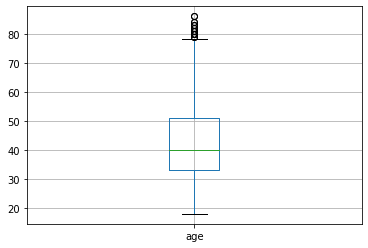

In [22]:
#проверка на наличие выбросов
data.boxplot(column='age')
data['age'].describe()

In [23]:
print('Процент от общего числа:', len(data.query('age >= 79'))*100/total, '%')

Процент от общего числа: 0.22 %


In [24]:
#удаление пользователей стрше 79 лет
data = data.query('age <= 79')

Text(0, 0.5, 'Количество клиентов')

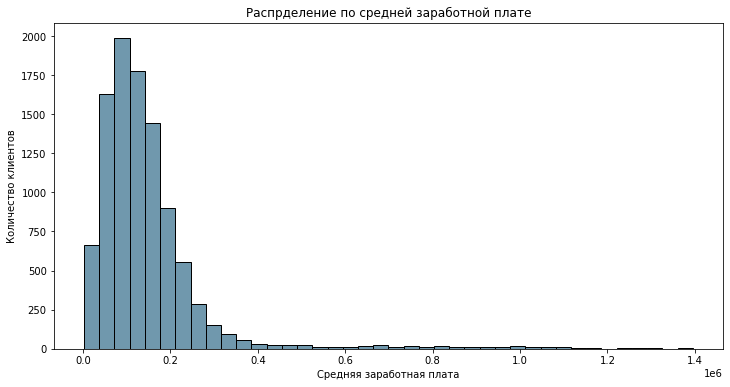

In [25]:

fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=data, x='est_salary', bins=40, color = "#407692" )
plt.title('Распрделение по средней заработной плате')
plt.xlabel('Средняя заработная плата')
plt.ylabel('Количество клиентов')


In [26]:
# удалям пользователей с зп меньше МРОТ
data = data.query('est_salary >= 16000')

count    9834.000000
mean      849.002339
std        65.403995
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

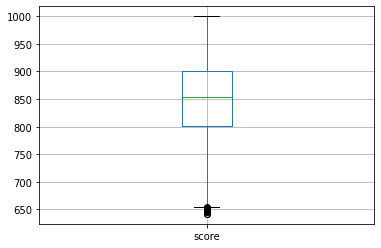

In [27]:
data.boxplot(column='score')
data['score'].describe()

In [28]:
data.query('score <= 650')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
265,157448,649,Рыбинск,М,37,0,NaN,1,1,1,81942,0
533,146648,649,Ярославль,М,33,0,NaN,1,1,1,149318,0
921,179302,646,Ярославль,М,37,0,NaN,1,1,1,148297,0
2494,208801,650,Ярославль,М,56,0,NaN,1,1,0,119643,0
2525,151179,642,Рыбинск,М,69,0,NaN,1,1,1,35917,0
3157,173067,649,Ярославль,М,46,0,NaN,1,1,1,121654,0
4059,164000,648,Ярославль,М,28,0,NaN,1,1,0,27790,0
4676,135725,648,Ярославль,Ж,59,0,NaN,1,1,1,50326,0
5115,213745,646,Рыбинск,Ж,25,0,NaN,2,1,0,60562,0
6426,169067,649,Ярославль,М,55,0,NaN,1,1,1,130672,0


In [29]:
print('Процент от общего числа:', len(data.query('score <= 650'))*100/total, '%')

Процент от общего числа: 0.15 %


In [30]:
# удалям пользователей с баллом меньше 650
data = data.query('score >= 650')

count        7580.000000
mean       833324.221813
std       1994145.431642
min             0.000000
25%        298225.737500
50%        528339.950000
75%        984733.202500
max     119113552.010000
Name: balance, dtype: float64

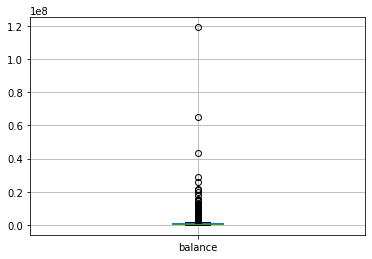

In [31]:
pd.set_option('float_format', '{:f}'.format)
data.boxplot(column='balance')
data['balance'].describe()

In [32]:
#посмотрим на пользователя с 0 продуктов
data[data['balance']==119113552.010000]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7560,156149,900,Ярославль,М,62,5,119113552.010000,2,1,1,138041,0


In [33]:
#похоже на ошибку, удалям его
data = data.drop (index= 7560)

In [34]:
# проверим, есть ли пользователь с 0 продуктов
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8902,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063,1


In [35]:
#удалям его, т.к. продуктов должно быть минимум 1
data = data.drop (index= 8902)

In [36]:
print('Количество потерь:', total- len(data))
print(f'Процент потерь:','{0:.2%}'.format(((total- len(data))/total)))

Количество потерь: 181
Процент потерь: 1.81%


 ### Создание новых столбцов

In [37]:
#создание новых столбцов для корреляции
data['n_gender'] = data['gender']
data = pd.get_dummies(data, columns=['gender'])
data['n_city'] = data['city']
data = pd.get_dummies(data, columns=['city'])
data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,n_gender,gender_Ж,gender_М,n_city,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,25,1,59214.820000,2,0,1,75719,1,Ж,1,0,Рыбинск,0,1,0
1,146556,861,37,5,850594.330000,3,1,0,86621,0,Ж,1,0,Рыбинск,0,1,0
2,120722,892,30,0,NaN,1,1,1,107683,0,Ж,1,0,Рыбинск,0,1,0
3,225363,866,51,5,1524746.260000,2,0,1,174423,1,Ж,1,0,Ярославль,0,0,1
4,157978,730,34,5,174.000000,1,1,0,67353,1,М,0,1,Ярославль,0,0,1


**ВЫВОД**

В ходе предоработке были изменины названия столбцов и  типов данных, удалалены дубликаты и выбросы, потзователь с 0 продуктов, пользователи с заработной платой меньше 16 000

## Анализ данных

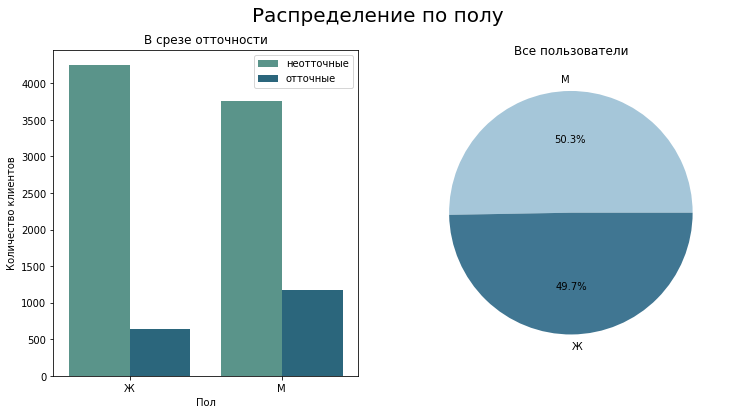

In [38]:
data_gen= data['n_gender'].value_counts().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по полу', size = 20)


sns.countplot(data=data, x="n_gender", hue="churn", palette='crest', ax=axes[0])
axes[0].set_title("В срезе отточности")
axes[0].legend(['неотточные', 'отточные'])
axes[0].set_ylabel("Количество клиентов")
axes[0].set_xlabel("Пол")




colors = ["#a5c6d9", "#407692"]
plt.pie(data=data_gen, labels= data_gen['index'], x= data_gen['n_gender'], autopct='%.1f%%',colors = colors)
axes[1].set_title("Все пользователи")

plt.show()

**Среди всех клиентов мужчины и женщины распределены поровну. У отточных клиентов больше мужчин, у неотточных- женщин**  

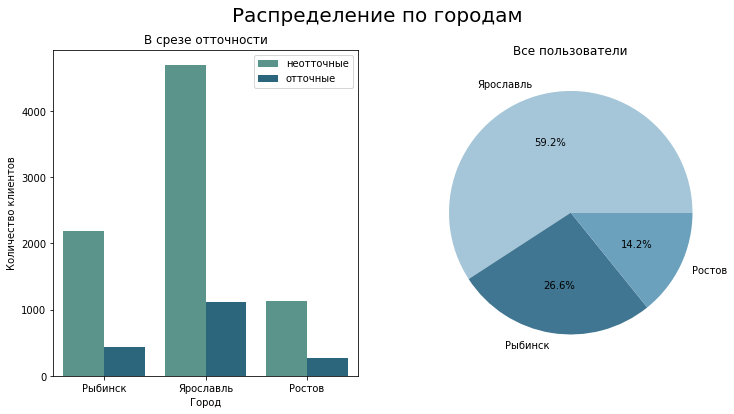

In [39]:
data_city= data['n_city'].value_counts().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по городам', size = 20)


sns.countplot(data=data, x="n_city", hue="churn", palette='crest', ax=axes[0])
axes[0].set_title("В срезе отточности")
axes[0].legend(['неотточные', 'отточные'])
axes[0].set_ylabel("Количество клиентов")
axes[0].set_xlabel("Город")


colors = ["#a5c6d9", "#407692", "#6ba1bd"]
plt.pie(data=data_city, labels= data_city['index'], x= data_city['n_city'], autopct='%.1f%%',colors = colors)
axes[1].set_title("Все пользователи")

plt.show()

**Город Ярославль лидирует среди всех пользователей, у отточных и неотточных**

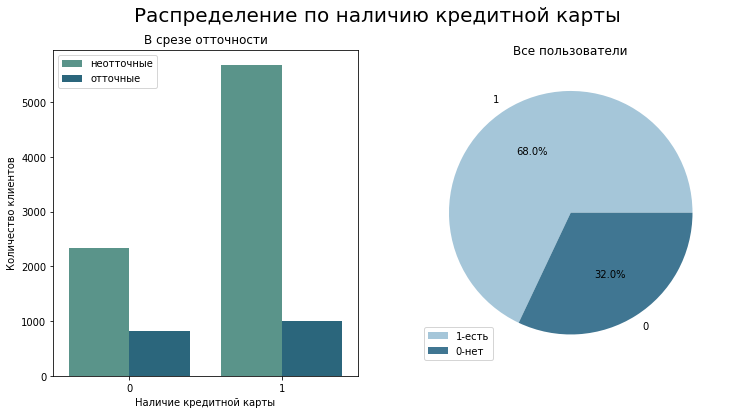

In [40]:
data_cr= data['credit_card'].value_counts().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по наличию кредитной карты', size = 20) 


colors = ["#ABB9C2", "#5E7B8B"]
sns.countplot(data=data, x="credit_card", hue="churn", palette='crest', ax=axes[0])
axes[0].set_title("В срезе отточности")
axes[0].legend(['неотточные', 'отточные'])
axes[0].set_ylabel("Количество клиентов")
axes[0].set_xlabel("Наличие кредитной карты")


colors = ["#a5c6d9", "#407692", "#1a3f59"]
plt.pie(data=data_city, labels= data_cr['index'], x= data_cr['credit_card'], autopct='%.1f%%',colors = colors)
axes[1].set_title("Все пользователи")
axes[1].legend(['1-есть', '0-нет'])

plt.show()

**Среди всех клиентов у большинства есть кредитная карта, то же самое и у неотточных клиентов, у неотточных- среднее количества клиентов с картой и без неё почти одинаково** 

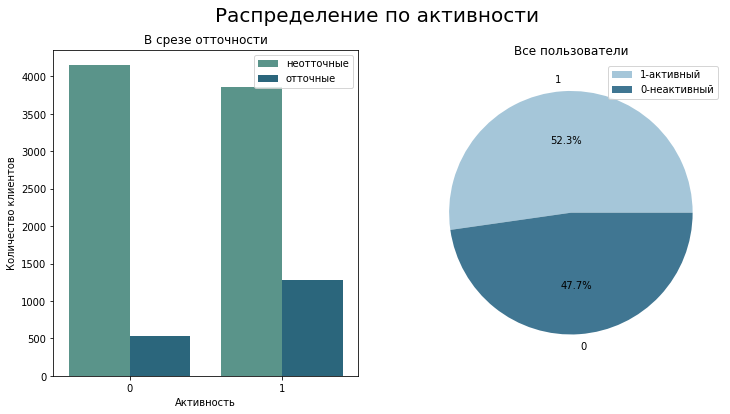

In [41]:

data_la= data['last_activity'].value_counts().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по активности', size = 20) 


colors = ["#ABB9C2", "#5E7B8B"]
sns.countplot(data=data, x="last_activity", hue="churn", palette='crest', ax=axes[0])
axes[0].set_title("В срезе отточности")
axes[0].legend(['неотточные', 'отточные'])
axes[0].set_ylabel("Количество клиентов")
axes[0].set_xlabel("Активность")


colors = ["#a5c6d9", "#407692", "#1a3f59"]
plt.pie(data=data_la, labels= data_la['index'], x= data_la['last_activity'], autopct='%.1f%%',colors = colors)
axes[1].set_title("Все пользователи")
axes[1].legend(['1-активный', '0-неактивный'])

plt.show()

**По всем пользователям наблюдается почти равное распределение на активных и нет. Среди неотточных преобладают неактивные, но разница небольшая. Отточне в основном активные** 

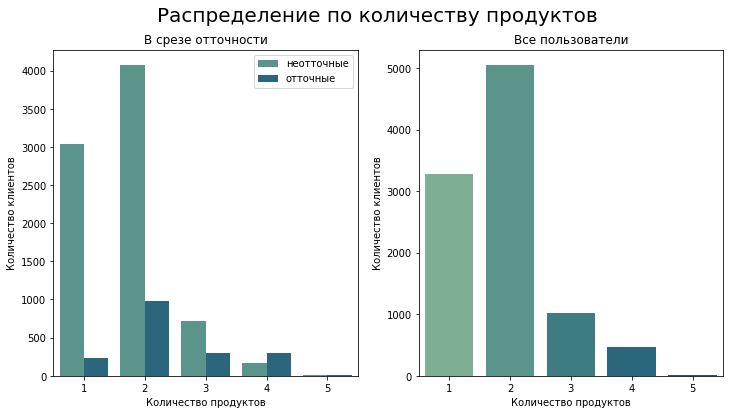

In [42]:
data_pr= data['products'].value_counts().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по количеству продуктов', size = 20) 


sns.countplot(data=data, x="products", hue="churn", palette='crest', ax=axes[0])
axes[0].set_title("В срезе отточности")
axes[0].legend(['неотточные', 'отточные'])
axes[0].set_ylabel("Количество клиентов")
axes[0].set_xlabel("Количество продуктов")

sns.barplot(x='index', y='products', data=data_pr,palette='crest', ax=axes[1])
axes[1].set_ylabel("Количество клиентов")
axes[1].set_xlabel("Количество продуктов")
axes[1].set_title("Все пользователи")

plt.show()

**Среди всех пользователей, а также среди отточных и неотточных преобладающее количество продуктов-2** 

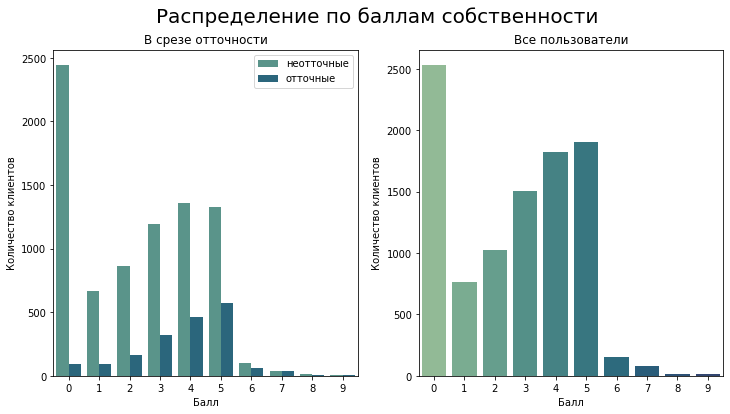

In [43]:
data_eq= data['equity'].value_counts().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по баллам собственности', size = 20) 


sns.countplot(data=data, x="equity", hue="churn", palette='crest', ax=axes[0])
axes[0].set_title("В срезе отточности")
axes[0].legend(['неотточные', 'отточные'])
axes[0].set_ylabel("Количество клиентов")
axes[0].set_xlabel("Балл")

sns.barplot(x='index', y='equity', data=data_eq,palette='crest', ax=axes[1])
axes[1].set_ylabel("Количество клиентов")
axes[1].set_xlabel("Балл")
axes[1].set_title("Все пользователи")

plt.show()

**У большинства из всех пользователей - 0 баллов собственности, как и у большинства отточных, у неотточных - 5** 

In [44]:
# создаём фреймы только с отточными и только с неотточными клиентами
ch_0 = data.query('churn == 0')
ch_1 = data.query('churn == 1')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Все пользователи')

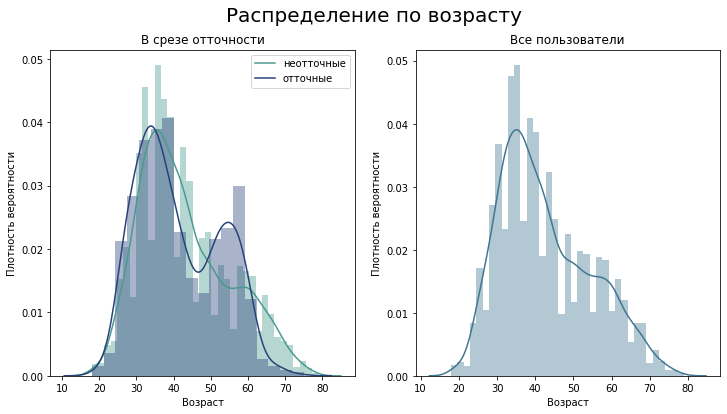

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по возрасту', size = 20) 

sns.distplot(ch_0['age'],ax=axes[0], color = '#4a9a8f')
sns.distplot(ch_1['age'],ax=axes[0],color = '#284179')


axes[0].set_title("В срезе отточности")
axes[0].legend(['неотточные', 'отточные'])
axes[0].set_ylabel("Плотность вероятности")
axes[0].set_xlabel("Возраст")

sns.distplot(data['age'],ax=axes[1],  color = '#407692')
axes[1].set_ylabel("Плотность вероятности")
axes[1].set_xlabel("Возраст")
axes[1].set_title("Все пользователи")

**Распределение по возрасту всех пользователей показывает, что в основном это люди от 25 до 45 лет, похожая картина у неотточных клиентов. У отточных заметно две группы: от 25 до 45 и от 50
до 65лет**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Все пользователи')

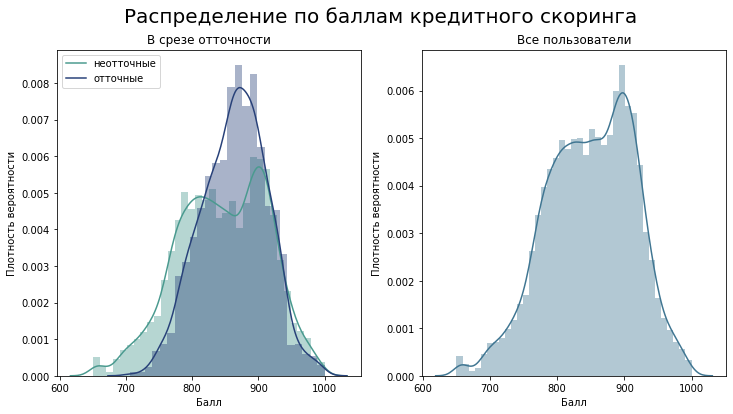

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по баллам кредитного скоринга', size = 20) 

sns.distplot(ch_0['score'],ax=axes[0], color = '#4a9a8f')
sns.distplot(ch_1['score'],ax=axes[0],color = '#284179')


axes[0].set_title("В срезе отточности")
axes[0].legend(['неотточные', 'отточные'])
axes[0].set_ylabel("Плотность вероятности")
axes[0].set_xlabel("Балл")

sns.distplot(data['score'],ax=axes[1],  color = '#407692')
axes[1].set_ylabel("Плотность вероятности")
axes[1].set_xlabel("Балл")
axes[1].set_title("Все пользователи")

**Среди всех пользователей баллы кредитного скроллинга распределены от 890 до 920, у неотточных - от 750 до 850 и от 850 до 900, у отточных от 800 до 920**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Все пользователи')

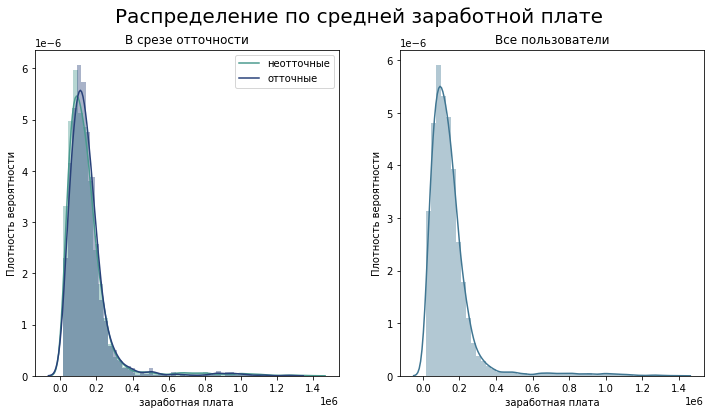

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по средней заработной плате', size = 20) 

sns.distplot(ch_0['est_salary'],ax=axes[0], color = '#4a9a8f')
sns.distplot(ch_1['est_salary'],ax=axes[0],color = '#284179')


axes[0].set_title("В срезе отточности")
axes[0].legend(['неотточные', 'отточные'])
axes[0].set_ylabel("Плотность вероятности")
axes[0].set_xlabel("заработная плата")

sns.distplot(data['est_salary'],ax=axes[1],  color = '#407692')
axes[1].set_ylabel("Плотность вероятности")
axes[1].set_xlabel("заработная плата")
axes[1].set_title("Все пользователи")

**Распределение по заработной плате примерно одинаково с пиком на 170 000 рублей**

**ВЫВОД**

*Общий портрет пользователя*

* Пол: Женщина или мужчина
* Город: Ярославль
* Кредитная карта: есть
* Активность: активный или не активный
* Продукты: 2 или 1
* Баллы собственности: 0 или 5
* Возраст: от 25 до 45 лет
* Баллы кредитного скоринга: от 890 до 920

*Портрет неотточных клиентов*

* Пол: Женщина
* Город: Ярославль
* Кредитная карта: есть 
* Активность: не активный
* Продукты: 2 или 1
* Баллы собственности: 0 
* Возраст: от 25 до 45 лет
* Баллы кредитного скоринга:  750 до 850 и от 870 до 900

*Портрет отточных клиентов*

* Пол: Мужчина
* Город: Ярославль
* Кредитная карта: есть или нет
* Активность: активный
* Продукты: 2 или 4
* Баллы собственности: 5 или 4
* Возраст: от 25 до 45 и от  50 до 65
* Баллы кредитного скоринга: 800 до 920


## Корреляция

In [48]:
print('\033[1m' + 'Корреляция по столбцу отточности' + '\033[0m')
data.corrwith(data['churn']).sort_values(key=abs).apply('{:.2f}'.format)

Корреляция по столбцу отточности


est_salary        -0.00
city_Ростов        0.00
user_id           -0.01
city_Ярославль     0.02
city_Рыбинск      -0.03
age               -0.05
score              0.10
balance            0.12
credit_card       -0.13
gender_Ж          -0.14
gender_М           0.14
last_activity      0.17
equity             0.27
products           0.30
churn              1.00
dtype: object

**ВЫВОД**

Самая высокая корреляция со столбцами: количество продуктов и количество баллов собственности

## Проверка гипотез

**Гипотеза №1**
о равенстве дохода между отточными и неотточными клиентами

H0- доходы отточных клиентов и доходы неотточных одинаковы

H1 - доходы отточных клиентов и доходы неотточных различаются

t-test предполагает, что данные:

* независимы
* распределены (приблизительно) нормально
* имеют одинаковую величину дисперсии в каждой сравниваемой группе (т. н. однородность дисперсии)

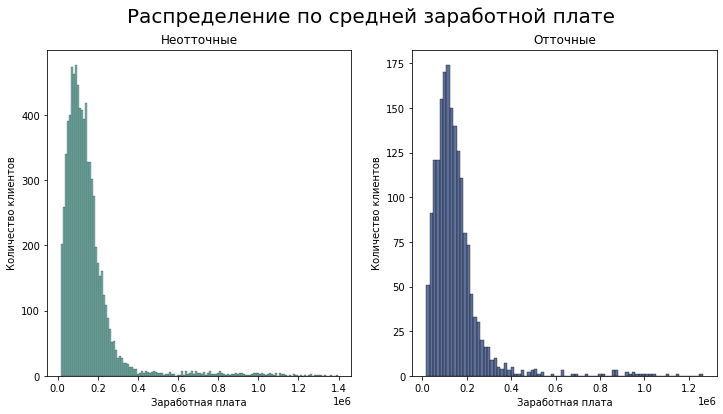

In [49]:
#прверим нормальное ли распределение

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по средней заработной плате', size = 20) 


sns.histplot(ch_0['est_salary'],  color='#4a9a8f', ax=axes[0])
axes[0].set_title("Неотточные")

axes[0].set_ylabel("Количество клиентов")
axes[0].set_xlabel("Заработная плата")

sns.histplot(ch_1['est_salary'], color='#284179', ax=axes[1])
axes[1].set_ylabel("Количество клиентов")
axes[1].set_xlabel("Заработная плата")
axes[1].set_title("Отточные")

plt.show()

In [50]:
print('Дисперсии:',np.var(ch_0['est_salary']), np.var(ch_1['est_salary']))

Дисперсии: 20439772260.76915 15095744630.509804


* даные независимы
* распределение не является нормальным
* дисперсия не ровна

In [51]:
# проведем u-test
alpha = 0.05 

results = st.mannwhitneyu(ch_0['est_salary'], ch_1['est_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Cредний показатель доходов у неотточных клиентов:',ch_0['est_salary'].mean())
print('Cредний показатель доходов у отточных клиентов:',ch_1['est_salary'].mean())  

p-значение: 0.0010229139700984433
Отвергаем нулевую гипотезу
Cредний показатель доходов у неотточных клиентов: 149118.98351236572
Cредний показатель доходов у отточных клиентов: 148727.28350799778


**Гипотеза №2** о равенстве среднего балла кредитного скоринга

H0- средний балл кредитного скоринга отточных клиентов и средний балл кредитного скоринга неотточных одинаковы

H1 - средний балл кредитного скоринга отточных клиентов и средний балл кредитного скоринга неотточных различаются

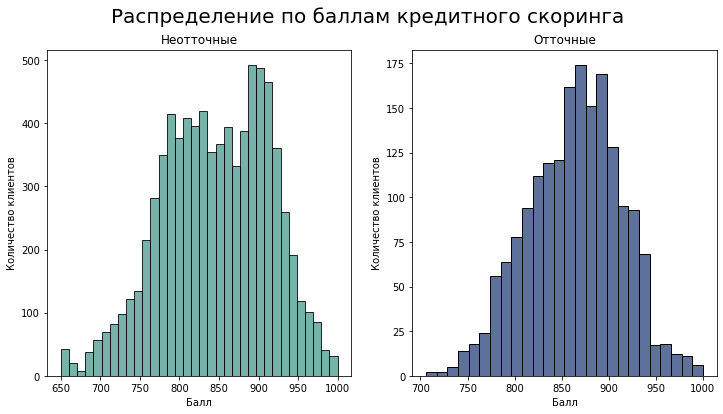

In [52]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Распределение по баллам кредитного скоринга ', size = 20) 


sns.histplot(ch_0['score'],  color='#4a9a8f', ax=axes[0])
axes[0].set_title("Неотточные")

axes[0].set_ylabel("Количество клиентов")
axes[0].set_xlabel("Балл")

sns.histplot(ch_1['score'], color='#284179', ax=axes[1])
axes[1].set_ylabel("Количество клиентов")
axes[1].set_xlabel("Балл")
axes[1].set_title("Отточные")

plt.show()

In [53]:
print('Дисперсии:', np.var(ch_0['score']), np.var(ch_1['score']))

Дисперсии: 4575.729459603399 2444.839038640158


* даные независимы
* распределение не является нормальным
* дисперсия не ровна

In [54]:
# проведем u-test

alpha = 0.05 

results = st.mannwhitneyu(ch_0['score'], ch_1['score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Cредний показатель балла кредитного скоринга у неотточных клиентов:',ch_0['est_salary'].mean())
print('Cредний показатель балла кредитного скоринга у отточных клиентов:',ch_1['est_salary'].mean())  

p-значение: 7.108709680264713e-21
Отвергаем нулевую гипотезу
Cредний показатель балла кредитного скоринга у неотточных клиентов: 149118.98351236572
Cредний показатель балла кредитного скоринга у отточных клиентов: 148727.28350799778


**ВЫВОД**

Нулевую гипотезу в обоих случаях можно отвергнуть. Cредний показатель доходов и средний балл кредитного скоринга у отточных и отточных клиентов клиентов неодинаков

## Сегментация на основе показателей

In [55]:
data_age = data.groupby('age')['user_id'].nunique().reset_index()
data_age['percent'] = data_age['user_id']* 100 / data['user_id'].nunique()

Text(0, 0.5, 'Проценты')

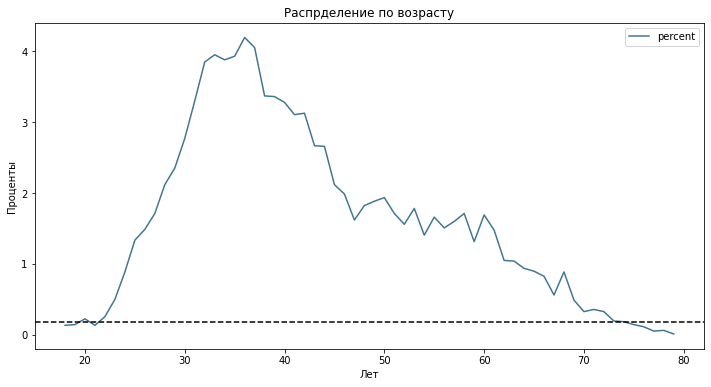

In [56]:

data_age.plot(figsize=(12,6), x = 'age', y = 'percent',color = "#407692" )
# добавдяем средний уровень оттока
plt.axhline(y=0.18,color='k', linestyle='--')
plt.title('Распрделение по возрасту')
plt.xlabel('Лет')
plt.ylabel('Проценты')

In [57]:
# добавляем группы по возрасту
def age_group(age):
    if 21 > age >= 18:
        return '1'
    if 74 >= age >= 22:
        return '2' 

In [58]:
data['age_group'] = data['age'].apply (age_group)

**Cегмент №1**
Мужчина- активный пользователь из города Ярославль

In [59]:
segment_1 = data.query (
    'gender_М==1 and city_Ярославль == 1 and last_activity == 1 ')  

In [60]:
print('Объём сегмента №1:',len(segment_1))
print('Количество отточных клиентов:',len(segment_1.query('churn == 1')))
print('Уровень отточности:',round((len(segment_1.query('churn == 1')))/(len(segment_1))*100),'%')

Объём сегмента №1: 1471
Количество отточных клиентов: 444
Уровень отточности: 30 %


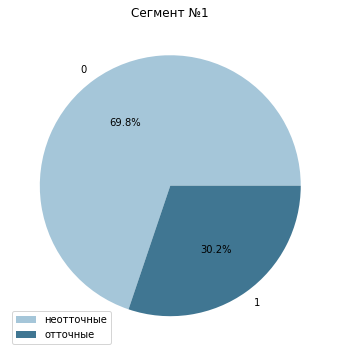

In [61]:
segment_1_ch= segment_1['churn'].value_counts().reset_index()

plt.subplots( figsize=(12, 6))

colors = ["#a5c6d9", "#407692"]
plt.pie(data=segment_1_ch, labels= segment_1_ch['index'], x= segment_1_ch['churn'], autopct='%.1f%%',colors = colors)
plt.title("Сегмент №1")
plt.legend(['неотточные', 'отточные'])

plt.show()

**Сегмент №2** Клиент в возрасте от 18 до 21 года, с баллами собственности 4 или 5

In [62]:
segment_2 = data.query (
    'age_group =="1" and equity==4 or equity==5')

In [63]:
print('Объём сегмента №2:',len(segment_2))
print('Количество отточных клиентов:',len(segment_2.query('churn == 1')))
print('Уровень отточности:',round((len(segment_2.query('churn == 1')))*100/(len(segment_2))),'%')

Объём сегмента №2: 1908
Количество отточных клиентов: 578
Уровень отточности: 30 %


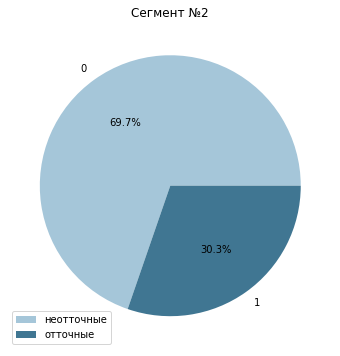

In [64]:
segment_2_ch= segment_2['churn'].value_counts().reset_index()

plt.subplots( figsize=(12, 6))

colors = ["#a5c6d9", "#407692"]
plt.pie(data=segment_2_ch, labels= segment_2_ch['index'], x= segment_2_ch['churn'], autopct='%.1f%%',colors = colors)
plt.title("Сегмент №2")
plt.legend(['неотточные', 'отточные'])

plt.show()

**Сегмент №3** Клиент в возрасте от 22 до 74 года, с баллами кредитного скоринга от 850 до 920  и 2 или 4 продуктами

In [65]:
segment_3 = data.query ('age_group =="2" and score >=850 and score <=920 and products==2 or products==4 ') 
    

In [66]:
print('Объём сегмента №3:',len(segment_3))
print('Количество отточных клиентов:',len(segment_3.query('churn == 1')))
print('Уровень отточности:',round((len(segment_3.query('churn == 1')))/(len(segment_3))*100),'%')

Объём сегмента №3: 2361
Количество отточных клиентов: 840
Уровень отточности: 36 %


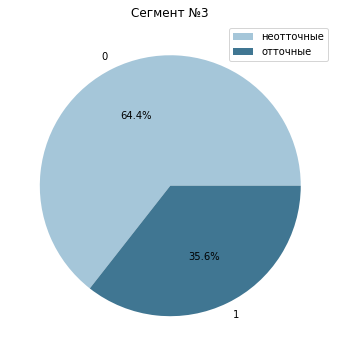

In [67]:
segment_3_ch= segment_3['churn'].value_counts().reset_index()

plt.subplots( figsize=(12, 6))

colors = ["#a5c6d9", "#407692"]
plt.pie(data=segment_3_ch, labels= segment_3_ch['index'], x= segment_3_ch['churn'], autopct='%.1f%%',colors = colors)
plt.title("Сегмент №3")
plt.legend(['неотточные', 'отточные'])

plt.show()

## Итговый вывод

На основе показателей выделели следующие сегменты:
    
**Сегмент №1**

* Пол: мужчина
* Город: Ярославль
* Кредитная карта: есть/нет
* Активность: активный 
* Продукты: от 1 до 5 
* Баллы собственности: 0 до 9
* Возраст: от 18 до 86  лет
* Баллы кредитного скоринга: от 650 до 1000

*Рекомендации: предложить кешбэк для товаров, которые чаще покупают мужчины, продумать зарплатные программы для предприятий в Ярославле*

    
**Сегмент №2**

* Пол: мужчина/женщина 
* Город: Ярославль/Рыбинск/Ростов
* Кредитная карта: есть/нет
* Активность: активный/не активный 
* Продукты: от 1 до 5 
* Баллы собственности: 4/5
* Возраст: от 18 до 21 года
* Баллы кредитного скоринга: от 650 до 1000

*Рекомендации:  предложить льготы для студентов*
    
**Сегмент №3**

* Пол: мужчина/женщина 
* Город: Ярославль/Рыбинск/Ростов
* Кредитная карта: есть/нет
* Активность: активный/не активный 
* Продукты: 2/4 
* Баллы собственности: от 0 до 9 
* Возраст: от 22 до 74
* Баллы кредитного скоринга: от 850 до 920

*Рекомендации: предложить льготы для клиентов пенсионного возраста, предложить более выгодные условия по кредиту*
